In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

punta arenas cl
presidencia roque saenz pena ar
drovyanaya ru
bredasdorp za
panacan ph
barrow us
punta arenas cl
itarema br
saint george bm
niamey ne
sindou bf
vaini to
albany au
ponta do sol cv
avarua ck
mataura pf
hasaki jp
hobart au
haapiti pf
port alfred za
ushuaia ar
mutsamudu km
hermanus za
bikin ru
luderitz na
barentsburg sj
rikitea pf
dangriga bz
boa vista br
khuzhir ru
nyaunglebin mm
antofagasta cl
north bend us
road town vg
ushuaia ar
avarua ck
kahului us
butaritari ki
nanortalik gl
torbay ca
ushuaia ar
avarua ck
hilo us
bolungarvik is
kiama au
ushuaia ar
tanabe jp
puerto ayora ec
kavieng pg
iralaya hn
ushuaia ar
ribeira grande pt
talcahuano cl
butaritari ki
barrow us
antofagasta cl
itarema br
laguna de perlas ni
baiyin cn
airai pw
cayenne gf
jamestown sh
rikitea pf
contamana pe
touros br
beringovskiy ru
fevralsk ru
celestun mx
teplodar ua
mataura pf
port alfred za
guerrero negro mx
bredasdorp za
cabo san lucas mx
luwuk id
rikitea pf
kapoeta sd
bengkulu id
kapaa us
arraial do

hermanus za
busselton au
peleduy ru
taolanaro mg
esperance au
horqueta py
guerrero negro mx
ushuaia ar
new norfolk au
ushuaia ar
taolanaro mg
barentsburg sj
butaritari ki
jamestown sh
san policarpo ph
bolshegrivskoye ru
puerto ayora ec
meadow lake ca
waipawa nz
kishni in
nantucket us
zolotinka ru
zvishavane zw
busselton au
pangnirtung ca
airai pw
rikitea pf
seoul kr
mahebourg mu
punta arenas cl
karaul ru
busselton au
bogotol ru
taolanaro mg
albany au
rikitea pf
iqaluit ca
punta arenas cl
hermanus za
tabiauea ki
tuktoyaktuk ca
mar del plata ar
kirakira sb
marihatag ph
lebu cl
almaznyy ru
busselton au
fortuna us
yellowknife ca
bengkulu id
rikitea pf
lerwick gb
thompson ca
samarai pg
hithadhoo mv
kapaa us
kodiak us
nsanje mw
atuona pf
plettenberg bay za
kodiak us
punta arenas cl
tuatapere nz
rikitea pf
adre td
clyde river ca
berbera so
oistins bb
albany au
butaritari ki
thompson ca
rikitea pf
mar del plata ar
port alfred za
saint-philippe re
taolanaro mg
tsihombe mg
kinango ke
geraldton a

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

624

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68d380c51476a1a0cf56f03a4d3cf88b


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68d380c51476a1a0cf56f03a4d3cf88b&q=Boston


In [13]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [14]:
# Get the text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 56.82,
  'feels_like': 55.63,
  'temp_min': 50.52,
  'temp_max': 62.35,
  'pressure': 1014,
  'humidity': 73},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 260},
 'clouds': {'all': 3},
 'dt': 1623993900,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1624007224,
  'sunset': 1624062229},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data["sys"]["country"]

'US'

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 62.35 73 3 10.36


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-06-18 05:25:00'

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")
# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | presidencia roque saenz pena
Processing Record 3 of Set 1 | drovyanaya
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | panacan
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | itarema
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | niamey
Processing Record 10 of Set 1 | sindou
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | haapiti
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | mutsamudu
City not found. Skipping...
Processing Record 22 of Set 1 | hermanus
Pro

Processing Record 36 of Set 4 | skibbereen
Processing Record 37 of Set 4 | comendador
Processing Record 38 of Set 4 | hambantota
Processing Record 39 of Set 4 | atuona
Processing Record 40 of Set 4 | hervey bay
Processing Record 41 of Set 4 | ilulissat
Processing Record 42 of Set 4 | wenling
Processing Record 43 of Set 4 | homer
Processing Record 44 of Set 4 | rungata
City not found. Skipping...
Processing Record 45 of Set 4 | kaitangata
Processing Record 46 of Set 4 | bagan
Processing Record 47 of Set 4 | souillac
Processing Record 48 of Set 4 | sepolno krajenskie
Processing Record 49 of Set 4 | mana
Processing Record 50 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | yaan
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | altamont
Processing Record 5 of Set 5 | haines junction
Processing Record 6 of Set 5 | dekernes
Processing Record 7 of Set 5 | thompson
Processing Record 8 of Set 5 |

Processing Record 27 of Set 8 | yarim
Processing Record 28 of Set 8 | pemangkat
Processing Record 29 of Set 8 | longyearbyen
Processing Record 30 of Set 8 | lalganj
Processing Record 31 of Set 8 | coxim
Processing Record 32 of Set 8 | ust-ishim
Processing Record 33 of Set 8 | porto-vecchio
Processing Record 34 of Set 8 | port blair
Processing Record 35 of Set 8 | uvarovka
Processing Record 36 of Set 8 | marienburg
Processing Record 37 of Set 8 | turukhansk
Processing Record 38 of Set 8 | mabaruma
Processing Record 39 of Set 8 | victoria
Processing Record 40 of Set 8 | klaksvik
Processing Record 41 of Set 8 | tulsipur
Processing Record 42 of Set 8 | sorong
Processing Record 43 of Set 8 | port-gentil
Processing Record 44 of Set 8 | tome
Processing Record 45 of Set 8 | la asuncion
Processing Record 46 of Set 8 | alekseyevka
Processing Record 47 of Set 8 | chirongui
Processing Record 48 of Set 8 | acarau
Processing Record 49 of Set 8 | mackay
Processing Record 50 of Set 8 | pahrump
Process

Processing Record 12 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 13 of Set 12 | lake city
Processing Record 14 of Set 12 | camabatela
Processing Record 15 of Set 12 | makurdi
Processing Record 16 of Set 12 | berdigestyakh
Processing Record 17 of Set 12 | dawei
Processing Record 18 of Set 12 | ketchikan
Processing Record 19 of Set 12 | aksarka
Processing Record 20 of Set 12 | adrar
Processing Record 21 of Set 12 | caravelas
Processing Record 22 of Set 12 | kimbe
Processing Record 23 of Set 12 | cocorit
Processing Record 24 of Set 12 | kuching
Processing Record 25 of Set 12 | bathsheba
Processing Record 26 of Set 12 | vila velha
Processing Record 27 of Set 12 | coron
Processing Record 28 of Set 12 | asau
Processing Record 29 of Set 12 | debre tabor
Processing Record 30 of Set 12 | vila vicosa
Processing Record 31 of Set 12 | savannakhet
Processing Record 32 of Set 12 | kilindoni
Processing Record 33 of Set 12 | kvarkeno
Processing Record 34 of Set 12 | itapaci
P

In [19]:
# Check the code generated the expected number of cities.
len(cities)

624

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,33.91,86,40,10.36,CL,2021-06-18 05:25:18
1,Presidencia Roque Saenz Pena,-26.7852,-60.4388,49.68,57,100,4.16,AR,2021-06-18 05:25:18
2,Drovyanaya,51.5833,113.0333,60.31,84,100,12.03,RU,2021-06-18 05:25:18
3,Bredasdorp,-34.5322,20.0403,48.27,93,32,4.61,ZA,2021-06-18 05:25:19
4,Panacan,9.2463,118.4082,89.71,66,82,6.82,PH,2021-06-18 05:25:19
5,Barrow,71.2906,-156.7887,53.62,71,1,6.91,US,2021-06-18 05:21:39
6,Itarema,-2.9248,-39.9167,77.88,82,9,12.73,BR,2021-06-18 05:25:20
7,Saint George,37.1041,-113.5841,94.78,13,1,3.00,US,2021-06-18 05:25:20
8,Niamey,13.5137,2.1098,80.89,65,0,9.22,NE,2021-06-18 05:24:18
9,Sindou,10.6667,-5.1667,73.89,76,85,3.33,BF,2021-06-18 05:25:21


In [21]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-06-18 05:25:18,-53.1500,-70.9167,33.91,86,40,10.36
1,Presidencia Roque Saenz Pena,AR,2021-06-18 05:25:18,-26.7852,-60.4388,49.68,57,100,4.16
2,Drovyanaya,RU,2021-06-18 05:25:18,51.5833,113.0333,60.31,84,100,12.03
3,Bredasdorp,ZA,2021-06-18 05:25:19,-34.5322,20.0403,48.27,93,32,4.61
4,Panacan,PH,2021-06-18 05:25:19,9.2463,118.4082,89.71,66,82,6.82


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

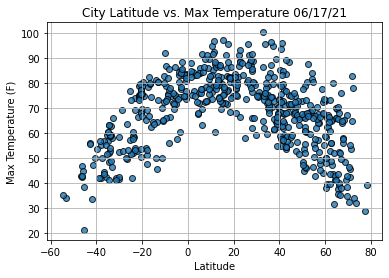

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

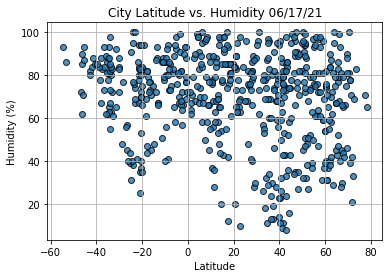

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

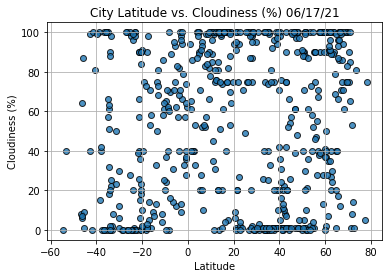

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

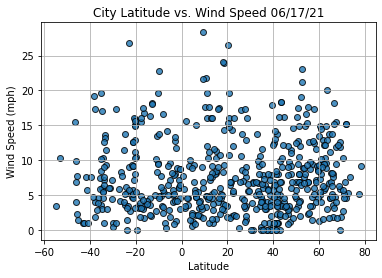

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [29]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [30]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)
print(f'The p-value is : {p_value:.3f}')

y = -0.45x + 92.94
The p-value is : 0.011


In [31]:
# Calculate the regression line "y values" from the slope and intercept
regress_values = [(lat * slope + intercept) for lat in lats]

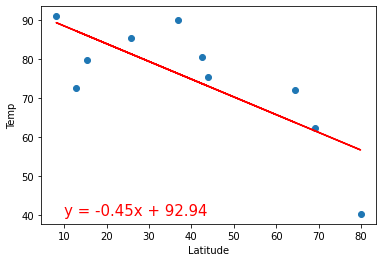

In [32]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

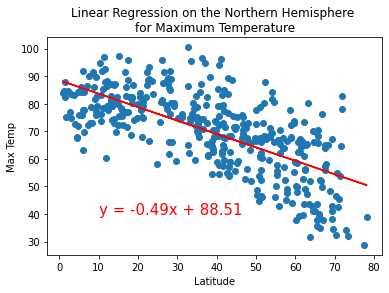

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Maximum Temperature', 'Max Temp',(10,40))


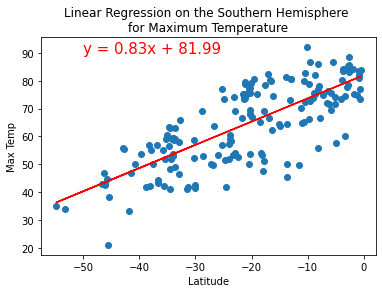

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for Maximum Temperature', 'Max Temp',(-50,90))

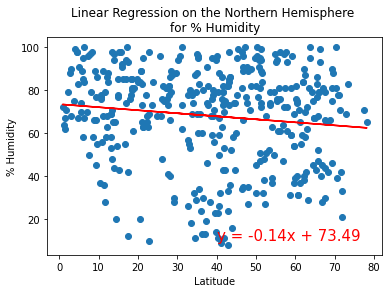

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

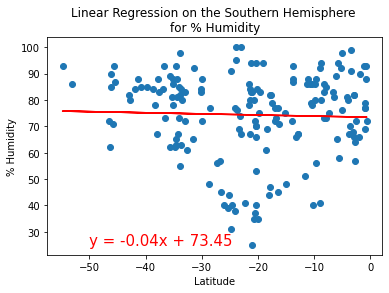

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,25))

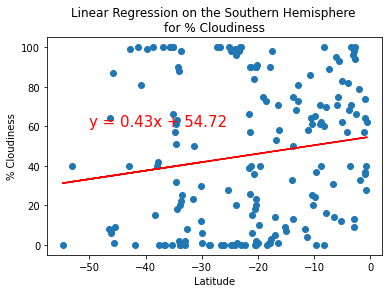

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

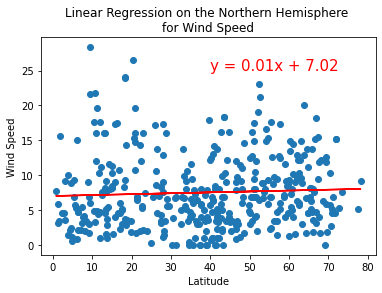

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,25))

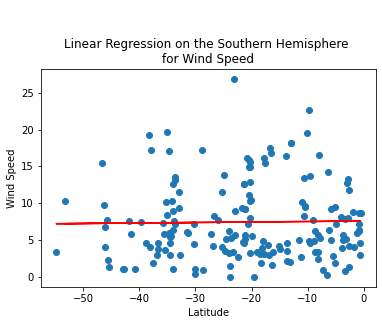

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,35))